# statLearning project -- Cifar-10 image classfication

*This project use cifar-10 as training set and the final result will be tested by new images from network.*

This jupyter file contain two parts:

- KNN algortithm from sklearn package
- MLP by using TensorFlow



The dataset can be downloaded by 


*wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz*


than unzip the dataset.

You contents are like these:

- ----cifar-10-batches-py
- ----statlearning.ipynb
- ----data_utils.py

In [1]:
# Run some setup code for this notebook.

import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'F:/course/统计学习方法/cifar-10-batches-py'

x_train_raw, y_train_raw, x_test_raw, y_test_raw = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', x_train_raw.shape)
print('Training labels shape: ', y_train_raw.shape)
print('Test data shape: ', x_test_raw.shape)
print('Test labels shape: ', y_test_raw.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train_raw == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train_raw[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [7]:
# subsample data for more dfficient code execution 
num_training = 30000
#range(5)=[0,1,2,3,4]
mask = range(num_training)
x_train = x_train_raw[mask]
y_train = y_train_raw[mask]
num_test = 6000
mask = range(num_test)
x_test = x_test_raw[mask]
y_test = y_test_raw[mask]

In [8]:
#the image data has three chanels
#the next two step shape the image size 32*32*3 to 3072*1
x_train = np.reshape(x_train,(x_train.shape[0],-1))
x_test = np.reshape(x_test,(x_test.shape[0],-1))
print ("after subsample and re shape:")
print ('x_train : ',x_train.shape,'x_test : ',x_test.shape)

after subsample and re shape:
x_train :  (30000, 3072) x_test :  (6000, 3072)


In [5]:
from sklearn import neighbors
n_neighbors = 5

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(x_train, y_train)

In [ ]:

y_test_pred = clf.predict(x_test)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / len(y_test)
print('Got %d / %d correct => accuracy: %f' % (num_correct, len(y_test), accuracy))

# Plotting Validation Curves

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [5, 10, 12, 15, 20, 30, 50,80,100]
train_scores, test_scores = validation_curve(
    neighbors.KNeighborsClassifier(), 
    x_train, y_train, 
    param_name="n_neighbors", 
    param_range=param_range,
    cv=3, 
    scoring="accuracy", n_jobs=7)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [ ]:
from pylab import *  
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  


plt.title("Validation Curve with KNN")
plt.xlabel("neighbors")
plt.ylabel("accuracy")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid(True, linestyle = "-.",  linewidth = "1") 
plt.show()

# Plotting Learning Curves

In [9]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

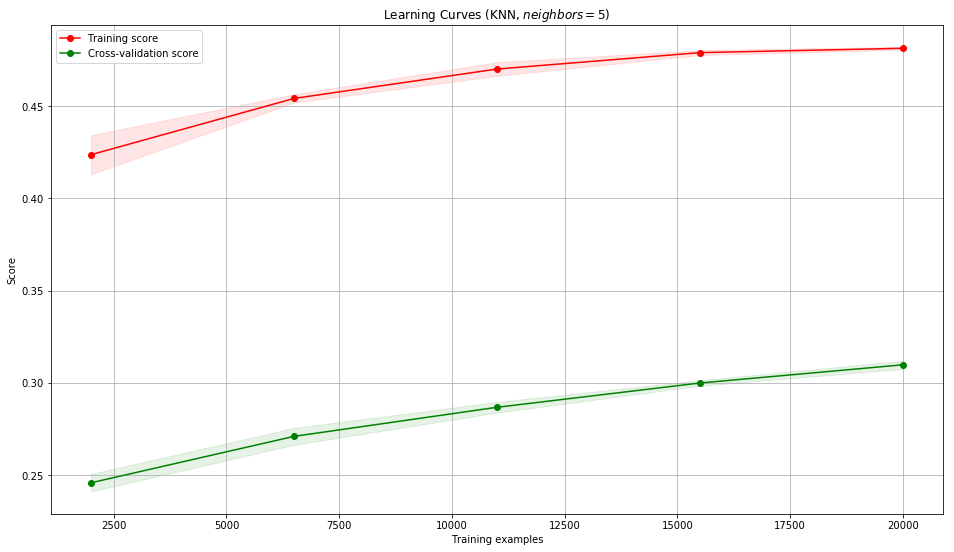

In [10]:
title = "Learning Curves (KNN, $neighbors=5$)"
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)
plot_learning_curve(estimator, title, x_train, y_train, n_jobs=7)

# Model Test

In [ ]:
from sklearn import neighbors
n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(x_train, y_train)

In [ ]:
y_test_pred = clf.predict(x_test)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / len(y_test)
print('Got %d / %d correct => accuracy: %f' % (num_correct, len(y_test), accuracy))

In [ ]:
n_neighbors = 10
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(x_train, y_train)

y_test_pred = clf.predict(x_test)
# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / len(y_test)
print('Got %d / %d correct => accuracy: %f' % (num_correct, len(y_test), accuracy))

In [ ]:
n_neighbors = 5
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(x_train, y_train)

y_test_pred = clf.predict(x_test)
# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / len(y_test)
print('Got %d / %d correct => accuracy: %f' % (num_correct, len(y_test), accuracy))